# **Title : Language Detection using NLP** 

# **Introduction:**
Language detection is a natural language processing task where we need to identify the language of a text or document using machine learning. Language identification was a difficult task a few years ago because there was not a lot of data on languages, but nawadays data is available with ease, using data and with the help of Natural Language Processing(NLP) we can build amazing models which can easily identify/detect the language of a text.

**Keywords** : Language detection, NLP, Kaggle, Naive Bayes,Prediction.


# **Problem Statment:**
As a human, one can easily detect the languages he/she knows. For example, I can easily identify Hindi,English and Kannada, but being an Indian, it is also not possible for me to identify all Indian languages. This is where the language identification task can be used.  
So for such cases, i have come up with a tool Language detector using Natural Language Processing

# **About Dataset:**
The most important part of training a language detection model is data. The more data you have about every language, the more accurate your model will perform in real-time. The dataset that we are using is collected from **Kaggle**, which contains data about **17 popular languages** and contains required sentences in each of the languages, so it will be an appropriate dataset for training a language detection model with machine learning.

# **Implementation** 

# **1.Importing all required libraries**

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# **2.Importing Dataset**

In [4]:
dataset = pd.read_csv("Language Detection.csv")
#head function to show up first 5 rows
dataset.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [26]:
dataset.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


we can see that there are 17 different language in this dataset

In [6]:
#checking for null values
dataset.isnull()

,Text,Language
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10332,False,False
10333,False,False
10334,False,False
10335,False,False


as we can see above, there are no null values

**Let’s count the value count for each language**

In [7]:
dataset["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# **3.Separating Independent and Dependent features**  
Now we can separate the dependent and independent variables,   
here **text** data is the independent variable and the **language** name is the dependent variable.

In [8]:
text_col = dataset["Text"]
lang_col = dataset["Language"]

# **4.Label Encoding**  
Our output variable, the name of languages is a categorical variable. For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are importing LabelEncoder from sklearn.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lang_col = le.fit_transform(lang_col)

# **5.Text Preprocessing**  
This is a dataset is created using scraping the Wikipedia, so it contains many unwanted symbols, numbers which will affect the quality of our model. So we should perform text preprocessing techniques and remove irrelated characters.

In [10]:
#creating a list appending the preprocessed text
new_list = []

for text in text_col:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    new_list.append(text)

# **Bag of Words**  
As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text_col = cv.fit_transform(new_list).toarray()
text_col.shape

(10337, 34937)

# **6.Train Test Splitting**  
We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set. For this process, we are using a train test split.

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_col, lang_col, test_size = 0.20)

# **7.Model Training**  
We are using the naive_bayes algorithm for our model creation. Later we are training the model using the training set.

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

# **8.Model Prediction**  
So we’ve trained our model using the training set. Now let’s predict the output for the test set.

In [14]:
y_pred = model.predict(x_test)

# **9.Model Evaluation**  
Now we can evaluate our model

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy of the model is : ",ac)

Accuracy of the model is :  0.9738878143133463


The accuracy of the model is 0.97 which is very good and our model is performing well.  
Now let’s plot the confusion matrix using the seaborn heatmap.

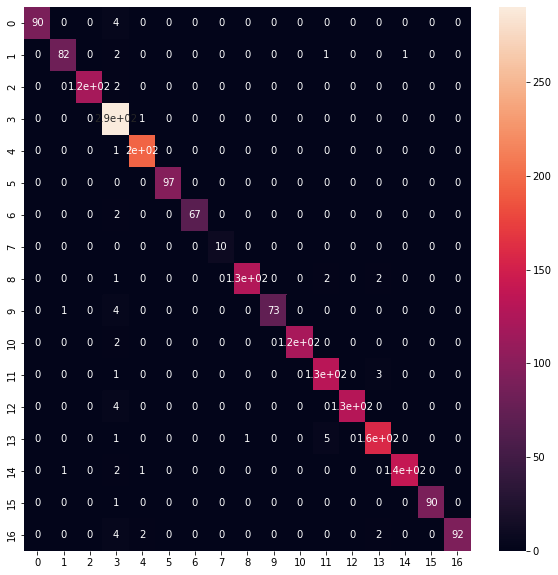

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()

#The graph will look like this 

When looking into each language, almost all the predictions are right.

In [40]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        94
           1       0.98      0.95      0.96        86
           2       1.00      0.98      0.99       121
           3       0.90      1.00      0.95       291
           4       0.98      0.99      0.99       196
           5       1.00      1.00      1.00        97
           6       1.00      0.97      0.99        69
           7       1.00      1.00      1.00        10
           8       0.99      0.96      0.98       133
           9       1.00      0.94      0.97        78
          10       1.00      0.98      0.99       123
          11       0.94      0.97      0.96       136
          12       1.00      0.97      0.98       134
          13       0.96      0.96      0.96       165
          14       0.99      0.97      0.98       144
          15       1.00      0.99      0.99        91
          16       1.00      0.92      0.96       100

    accuracy              

# **10.Prediction**  
Now let’s test the model prediction using text in different languages.

In [23]:
#function for predicting language
def predict(text):
  
  #converting text to bag of words model(vector)
  x = cv.transform([text]).toarray()

  #predicting the language
  lang = model.predict(x)

  #finding the language corresponding to the predicted value
  lang = le.inverse_transform(lang)

  #printing the language
  print("The text is in --> ",lang[0])

In [28]:
predict("This is a language detector")

The text is in -->  English


In [29]:
predict("यह एक भाषा संसूचक है")

The text is in -->  Hindi


In [30]:
predict("ಇದು ಭಾಷಾ ಶೋಧಕ")

The text is in -->  Kannada


In [31]:
predict("ഇതൊരു ഭാഷാ ഡിറ്റക്ടറാണ്")

The text is in -->  Malayalam


In [32]:
predict("இது ஒரு மொழி கண்டுபிடிப்பான்")

The text is in -->  Tamil


In [34]:
predict("Ceci est un détecteur de langue")

The text is in -->  French


In [35]:
predict("Este es un detector de idiomas.")

The text is in -->  Spanish


In [33]:
predict("Αυτός είναι ένας ανιχνευτής γλώσσας")

The text is in -->  Greek


**Accuracy of different algorithms:**  
Naive bayes - 97  
logistic regression - 95  
Decision Tree - 84   
KNN - 54

# **Conclusion:**  
This was my project of detecting a language of a given text, in this i used Naive Bayes , i even tried other algorithms(as you can see above) and found out that Naive bayes was the one which worked with higher accuracy. Using this detector we can easily detect the language of 17 different texts, this detector can be used in AI applications and can be worth somewhere. 
